In [30]:
import tensorflow
from tensorflow import keras
import numpy as np

In [3]:
%matplotlib inline

In [4]:
import matplotlib.pyplot as plt

In [5]:
batch_size = 128
num_class = 10
epochs = 20

In [6]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [7]:
len(x_train)

60000

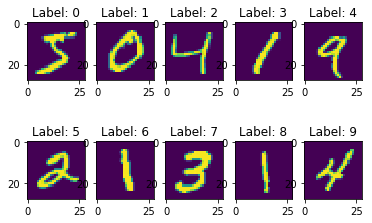

In [11]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.title("Label: " + str(i))
    plt.imshow(x_train[i].reshape(28, 28), cmap=None)


In [12]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [16]:
model = keras.models.Sequential([
    # 直列に並べる
    keras.layers.Flatten(),
    # 512個のノードを用意、relu = -:0, +:x
    keras.layers.Dense(512, activation='relu'),
    # 一部データを捨てる
    keras.layers.Dropout(0.2),
    # 多クラス -> softmax
    # 10個に集約する
    keras.layers.Dense(10 , activation='softmax')
])

In [20]:
# 最適化関数 RMSpropAdam SGD
# categorical_crossentropy: One-Hot-Encoding [1, 0, 0]とか
# sparse_categorical_crossentropy: 1, 2, 4とか、ターゲットが分類できる時


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [21]:
model.fit(x_train, y_train, epochs=20)

Epoch 1/20
60000/60000 [==============================] - 14s 233us/step - loss: 0.2200 - acc: 0.9342
Epoch 2/20
60000/60000 [==============================] - 13s 219us/step - loss: 0.0985 - acc: 0.9698
Epoch 3/20
60000/60000 [==============================] - 13s 216us/step - loss: 0.0693 - acc: 0.9788
Epoch 4/20
60000/60000 [==============================] - 13s 217us/step - loss: 0.0561 - acc: 0.9817
Epoch 5/20
60000/60000 [==============================] - 13s 223us/step - loss: 0.0422 - acc: 0.9861
Epoch 6/20
60000/60000 [==============================] - 13s 224us/step - loss: 0.0365 - acc: 0.9884
Epoch 7/20
60000/60000 [==============================] - 14s 226us/step - loss: 0.0314 - acc: 0.9894
Epoch 8/20
60000/60000 [==============================] - 13s 220us/step - loss: 0.0274 - acc: 0.9901
Epoch 9/20
60000/60000 [==============================] - 13s 212us/step - loss: 0.0254 - acc: 0.9916
Epoch 10/20
60000/60000 [==============================] - 13s 213us/step - loss: 

In [22]:
model.evaluate(x_test, y_test)


10000/10000 [==============================] - 0s 47us/step


[0.09096834914871907, 0.9822]

In [23]:
y_test[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

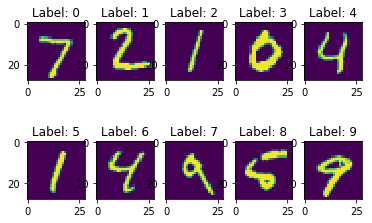

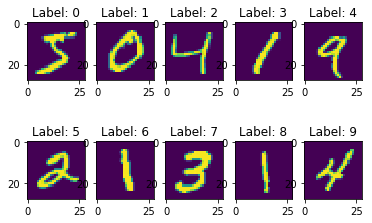

In [29]:
# それぞれの画像に対し、0~9 のどれに一番近いか推定
predicted = model.predict(x_test[0:10])

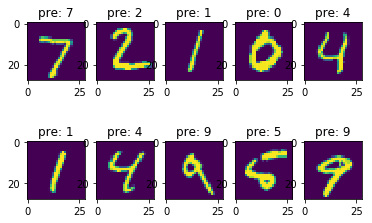

In [44]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.title("pre: " + str(np.argmax(predicted[i])))
    plt.imshow(x_test[i].reshape(28, 28), cmap=None)